In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

df=pd.read_csv('CarPrice_Assignment.csv')

In [2]:
#1. LOAD AND PREPARE DATA
data= df.drop(['car_ID', 'CarName'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [3]:
#2.SPLIT DATA
X=data.drop('price', axis=1)
y=data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [4]:
#3.CREATE AND TRAIN MODEL
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
print('Name: POOJA U ')
print('Reg.No: 21222523209 ')
print("\n=== Cross-Validation ===")
cv_scores= cross_val_score(model,X,y, cv=5)
print("Fold R2 scores:", [f"{score:.4f}" for score in cv_scores])
print(f"Average R2: {cv_scores.mean():.4f}")
#Test set evaluation
y_pred=model.predict(X_test)
print("\n=== Test Set Performance ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test,y_pred):.4f}")

Name: POOJA U 
Reg.No: 21222523209 

=== Cross-Validation ===
Fold R2 scores: ['0.6238', '0.6316', '0.3132', '0.3643', '-0.4944']
Average R2: 0.2877

=== Test Set Performance ===
MSE: 8482008.48
MAE: 2089.38
R2: 0.8926


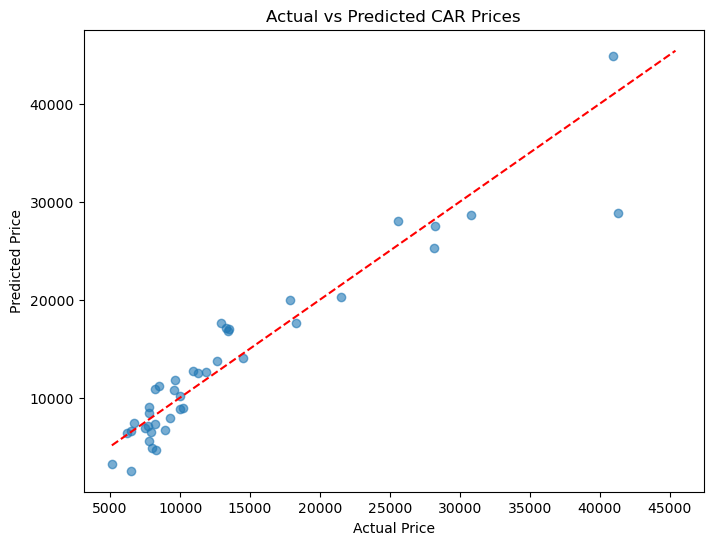

In [6]:
#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted CAR Prices")
plt.show()
